## Analyzing Coronavirus Evolution in Denmark and the United States: A Comparative Study of a Socialized Democratic and a Capitalistic Society
#### Kate Dannemiller
#### Denison University Data Analytics 
#### December 2020

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

### 1. Data: Economic, Governmental and Social Data
#### Reading in the data

In [2]:
#Global Economic Monitors
us_GEM = pd.read_excel('DataExtracts/Global_Economic_Monitor.xlsx', sheet_name = 'USA')
dk_GEM = pd.read_excel('DataExtracts/Global_Economic_Monitor.xlsx', sheet_name = 'DK')
META_GEM = pd.read_excel('DataExtracts/Global_Economic_Monitor.xlsx', sheet_name = 'Series - Metadata')

#Worldwide Governance Indciators
us_WGI = pd.read_excel('DataExtracts/Worldwide_Governance_Indicators.xlsx', sheet_name = 'US')
dk_WGI = pd.read_excel('DataExtracts/Worldwide_Governance_Indicators.xlsx', sheet_name = 'DK')
META_WGI = pd.read_excel('DataExtracts/Worldwide_Governance_Indicators.xlsx', sheet_name = 'Series - Metadata')

#World Development Indicators 
us_WDI = pd.read_excel('DataExtracts/World_Development_Indicators.xlsx', sheet_name = 'US')
dk_WDI = pd.read_excel('DataExtracts/World_Development_Indicators.xlsx', sheet_name = 'DK')
META_WDI = pd.read_excel('DataExtracts/World_Development_Indicators.xlsx', sheet_name = 'Series - Metadata')

#Poverty and Equity
us_PE = pd.read_excel('DataExtracts/Poverty_and_Equity.xlsx', sheet_name = 'US')
dk_PE = pd.read_excel('DataExtracts/Poverty_and_Equity.xlsx', sheet_name = 'DK')
META_PE = pd.read_excel('DataExtracts/Poverty_and_Equity.xlsx', sheet_name = 'Series - Metadata')

#Health Nutrition and Population Statistics 
us_HNP = pd.read_excel('DataExtracts/Health_Nutrition_and_Population.xlsx', sheet_name = 'US')
dk_HNP = pd.read_excel('DataExtracts/Health_Nutrition_and_Population.xlsx', sheet_name = 'DK')
META_HNP = pd.read_excel('DataExtracts/Health_Nutrition_and_Population.xlsx', sheet_name = 'Series - Metadata')

#Education Statistics
us_ES = pd.read_excel('DataExtracts/Education_Statistics.xlsx', sheet_name = 'US')
dk_ES = pd.read_excel('DataExtracts/Education_Statistics.xlsx', sheet_name = 'DK')
META_ES = pd.read_excel('DataExtracts/Education_Statistics.xlsx', sheet_name = 'Series - Metadata')

#### Additional cleaning and table creation

In [3]:
us_GEM = us_GEM.rename(columns = {'Series Code': 'Code'})
dk_GEM = dk_GEM.rename(columns = {'Series Code': 'Code'})

us_WGI = us_WGI.rename(columns = {'Series Code': 'Code'})
dk_WGI = dk_WGI.rename(columns = {'Series Code': 'Code'})

us_WDI = us_WDI.rename(columns = {'Series Code': 'Code'})
dk_WDI = dk_WDI.rename(columns = {'Series Code': 'Code'})

us_PE = us_PE.rename(columns = {'Series Code': 'Code'})
dk_PE = dk_PE.rename(columns = {'Series Code': 'Code'})

us_HNP = us_HNP.rename(columns = {'Series Code': 'Code'})
dk_HNP = dk_HNP.rename(columns = {'Series Code': 'Code'})

us_ES = us_ES.rename(columns = {'Series Code': 'Code'})
dk_ES = dk_ES.rename(columns = {'Series Code': 'Code'})

In [4]:
#Narrowing down variable selection. Data is from 2017

us_GEM_simple = us_GEM.iloc[[1,10,13],[0,1,2,5]]
dk_GEM_simple = dk_GEM.iloc[[1,10,13],[0,1,2,5]]

us_GEM_simple = us_GEM_simple.rename(columns = {2017: 'US Value','Series':'Series Name'})
dk_GEM_simple = dk_GEM_simple.rename(columns = {2017: 'DK Value','Series':'Series Name'})

us_GEM_simple.reset_index(inplace = True)
dk_GEM_simple.reset_index(inplace = True)

In [5]:
#Narrowing down variable selection. Data is from 2017

us_WGI_simple = us_WGI.iloc[[0,2,4,8,10],[0,1,2,5]]
dk_WGI_simple = dk_WGI.iloc[[0,2,4,8,10],[0,1,2,5]]

us_WGI_simple = us_WGI_simple.rename(columns = {2017: 'US Value'})
dk_WGI_simple = dk_WGI_simple.rename(columns = {2017: 'DK Value'})

us_WGI_simple.reset_index(inplace = True)
dk_WGI_simple.reset_index(inplace = True)

In [6]:
#Narrowing down variable selection. Data is from 2017

us_WDI_simple = us_WDI.iloc[[3,5,6,8,11],[0,1,2,5]]
dk_WDI_simple = dk_WDI.iloc[[3,5,6,8,11],[0,1,2,5]]

us_WDI_simple = us_WDI_simple.rename(columns = {2017: 'US Value'})
dk_WDI_simple = dk_WDI_simple.rename(columns = {2017: 'DK Value'})

us_WDI_simple.reset_index(inplace = True)
dk_WDI_simple.reset_index(inplace = True)

In [7]:
#Narrowing down variable selection. Data is from 2015 (US) and 2017 (DK)

us_PE_simple = us_PE.iloc[[0,2,3]] #2015
dk_PE_simple = dk_PE.iloc[[0,2,3]] #2017

us_PE_simple = us_PE_simple.rename(columns = {2015: 'US Value'})
dk_PE_simple = dk_PE_simple.rename(columns = {2017: 'DK Value'})

us_PE_simple.reset_index(inplace = True)
dk_PE_simple.reset_index(inplace = True)

In [8]:
#Narrowing down variable selection. Data is from 2016

us_HNP_simple = us_HNP.iloc[[1,2,16,19,20,26,29,32,33],[0,1,2,4]]
dk_HNP_simple = dk_HNP.iloc[[1,2,16,19,20,26,29,32,33],[0,1,2,4]]

us_HNP_simple = us_HNP_simple.rename(columns = {2016: 'US Value'})
dk_HNP_simple = dk_HNP_simple.rename(columns = {2016: 'DK Value'})

us_HNP_simple.reset_index(inplace = True)
dk_HNP_simple.reset_index(inplace = True)

In [9]:
#Narrowing down variable selection. Data is from 2016

us_ES_simple = us_ES.iloc[[14,16,19,20],[0,1,2,4]]
dk_ES_simple = dk_ES.iloc[[14,16,19,20],[0,1,2,4]]

us_ES_simple = us_ES_simple.rename(columns = {2016: 'US Value','Series':'Series Name'})
dk_ES_simple = dk_ES_simple.rename(columns = {2016: 'DK Value','Series':'Series Name'})

us_ES_simple.reset_index(inplace = True)
dk_ES_simple.reset_index(inplace = True)

In [10]:
#Concat 6 US tables into 1 overall US table 
US = pd.concat([us_GEM_simple, us_WGI_simple, us_WDI_simple, us_HNP_simple, us_ES_simple,us_PE_simple],keys = ['GEM', 'WGI','WDI','HNP','ES', 'PE'] , sort = False)
US.drop('index', axis = 1, inplace = True)
US

Country Code                                        Series Name  \
GEM 0          USA                               Core CPI,seas.adj,,,   
    1          USA               GDP,current US$,millions,seas. adj.,   
    2          USA                       Unemployment rate,Percent,,,   
WGI 0          USA                    Control of Corruption: Estimate   
    1          USA                 Government Effectiveness: Estimate   
    2          USA  Political Stability and Absence of Violence/Te...   
    3          USA                              Rule of Law: Estimate   
    4          USA                 Voice and Accountability: Estimate   
WDI 0          USA                            Economic Fitness Metric   
    1          USA                              GDP growth (annual %)   
    2          USA                   GDP per capita growth (annual %)   
    3          USA              Human capital index (HCI) (scale 0-1)   
    4          USA                 Inflation, GDP deflator (annual %)   
HNP 0          USA  Cause of death, by communicable diseases and m...   
    1          USA              Current health expenditure (% of GDP)   
    2          USA                      Physicians (per 1,000 people)   
    3          USA  Population ages 65 and above (% of total popul...   
    4          USA                       Population growth (annual %)   
    5          USA           Rural population (% of total population)   
    6          USA                Smoking prevalence, total, ages 15+   
    7          USA       Unemployment, total (% of total labor force)   
    8          USA           Urban population (% of total population)   
ES  0          USA  Percentage of graduates from Science, Technolo...   
    1          USA  Percentage of graduates from tertiary educatio...   
    2          USA  Percentage of graduates from tertiary educatio...   
    3          USA  Percentage of graduates from tertiary educatio...   
PE  0          USA                   GINI index (World Bank estimate)   
    1          USA                   Income share held by highest 20%   
    2          USA                    Income share held by lowest 20%   

                           Code     US Value  
GEM 0                    CORESA      114.286  
    1             NYGDPMKTPSACD  1.95194e+07  
    2                  UNEMPSA_      4.34167  
WGI 0                    CC.EST      1.38124  
    1                    GE.EST       1.5543  
    2                    PV.EST     0.335553  
    3                    RL.EST      1.64476  
    4                    VA.EST      1.04965  
WDI 0         SE.TER.CUAT.BA.ZS         10.9  
    1            NY.GDP.PCAP.KD      2.21701  
    2         NY.GDP.PCAP.PP.KD      1.57404  
    3               SH.IMM.IDPT        0.762  
    4            GC.XPN.INTP.ZS      1.90078  
HNP 0            SH.DTH.COMM.ZS          5.2  
    1         SH.XPD.CHEX.GD.ZS      17.1973  
    2            SH.MED.PHYS.ZS       2.5881  
    3         SP.POP.65UP.TO.ZS      15.0337  
    4               SP.POP.GROW     0.716669  
    5            SP.RUR.TOTL.ZS       18.138  
    6               SH.PRV.SMOK         21.8  
    7            SL.UEM.TOTL.ZS        4.869  
    8         SP.URB.TOTL.IN.ZS       81.862  
ES  0  UIS.FOSGP.5T8.F500600700      17.9202  
    1        UIS.FOSGP.5T8.F400      19.3043  
    2         SE.TER.GRAD.HL.ZS      17.0101  
    3        UIS.FOSGP.5T8.F600      3.78213  
PE  0               SI.POV.GINI         41.4  
    1            SI.DST.05TH.20         46.8  
    2            SI.DST.FRST.20          5.1

In [11]:
#Concat 6 DK tables into 1 overall DK table 
DK = pd.concat([dk_GEM_simple, dk_WGI_simple, dk_WDI_simple, dk_HNP_simple, dk_ES_simple,dk_PE_simple],keys = ['GEM', 'WGI','WDI','HNP','ES', 'PE'] , sort = False)
DK.drop('index', axis = 1, inplace = True)
DK

Country Code                                        Series Name  \
GEM 0          DNK                               Core CPI,seas.adj,,,   
    1          DNK               GDP,current US$,millions,seas. adj.,   
    2          DNK                       Unemployment rate,Percent,,,   
WGI 0          DNK                    Control of Corruption: Estimate   
    1          DNK                 Government Effectiveness: Estimate   
    2          DNK  Political Stability and Absence of Violence/Te...   
    3          DNK                              Rule of Law: Estimate   
    4          DNK                 Voice and Accountability: Estimate   
WDI 0          DNK                            Economic Fitness Metric   
    1          DNK                              GDP growth (annual %)   
    2          DNK                   GDP per capita growth (annual %)   
    3          DNK              Human capital index (HCI) (scale 0-1)   
    4          DNK                 Inflation, GDP deflator (annual %)   
HNP 0          DNK  Cause of death, by communicable diseases and m...   
    1          DNK              Current health expenditure (% of GDP)   
    2          DNK                      Physicians (per 1,000 people)   
    3          DNK  Population ages 65 and above (% of total popul...   
    4          DNK                       Population growth (annual %)   
    5          DNK           Rural population (% of total population)   
    6          DNK                Smoking prevalence, total, ages 15+   
    7          DNK       Unemployment, total (% of total labor force)   
    8          DNK           Urban population (% of total population)   
ES  0          DNK  Percentage of graduates from Science, Technolo...   
    1          DNK  Percentage of graduates from tertiary educatio...   
    2          DNK  Percentage of graduates from tertiary educatio...   
    3          DNK  Percentage of graduates from tertiary educatio...   
PE  0          DNK                   GINI index (World Bank estimate)   
    1          DNK                   Income share held by highest 20%   
    2          DNK                    Income share held by lowest 20%   

                           Code  DK Value  
GEM 0                    CORESA   108.022  
    1             NYGDPMKTPSACD    330329  
    2                  UNEMPSA_   4.19421  
WGI 0                    CC.EST   2.19338  
    1                    GE.EST   1.79694  
    2                    PV.EST  0.868219  
    3                    RL.EST   1.86385  
    4                    VA.EST   1.51554  
WDI 0         SE.TER.CUAT.BA.ZS       2.5  
    1            NY.GDP.PCAP.KD   2.03617  
    2         NY.GDP.PCAP.PP.KD   1.38182  
    3               SH.IMM.IDPT     0.774  
    4            GC.XPN.INTP.ZS   1.13353  
HNP 0            SH.DTH.COMM.ZS       6.5  
    1         SH.XPD.CHEX.GD.ZS   10.1812  
    2            SH.MED.PHYS.ZS    4.0099  
    3         SP.POP.65UP.TO.ZS   19.4225  
    4               SP.POP.GROW  0.780393  
    5            SP.RUR.TOTL.ZS    12.358  
    6               SH.PRV.SMOK      19.1  
    7            SL.UEM.TOTL.ZS     6.181  
    8         SP.URB.TOTL.IN.ZS    87.642  
ES  0  UIS.FOSGP.5T8.F500600700   20.4631  
    1        UIS.FOSGP.5T8.F400   24.8622  
    2         SE.TER.GRAD.HL.ZS   20.3271  
    3        UIS.FOSGP.5T8.F600    4.5316  
PE  0               SI.POV.GINI      28.7  
    1            SI.DST.05TH.20      38.1  
    2            SI.DST.FRST.20       9.1

In [12]:
#Merge the US and DK overall tables together
quant = US.merge(DK, on= 'Series Name')
quant.drop(['Country Code_x', 'Code_x', 'Country Code_y'], axis = 1, inplace = True)
quant.rename(columns = {'Code_y':'MetaCode'}, inplace = True)
quant= quant[['Series Name', 'MetaCode', 'US Value', 'DK Value']]
quant.drop_duplicates(inplace = True)

In [51]:
#Selecting the categories that highlight the biggest, or most explanatory, differences between countries 
quant_table = quant.iloc[[3,4,6,8,9,14,15,16,20,26,27],[0,2,3]]
quant_table.reset_index(inplace = True)
quant_table.drop('index', axis = 1, inplace = True)
cultural = ['Control of Corruption', 'Government Effectiveness','Rule of Law', 'Economic Fitness Metric', 'GDP Growth (annual %)', 'Current Health Expenditure (% of GDP)', 'Physicians per 1,000 people', '% of Population 65 and above', '% of Labor Force Unemployed', 'GINI Index', 'Income Share held by top 20%']
quant_table.rename(columns = {'Series Name': 'Cultural Variable', 'MetaCode': 'Metadata Code'}, inplace = True)
quant_table['Cultural Variable'] = cultural
quant_table

,Cultural Variable,US Value,DK Value
0,Control of Corruption,1.38124,2.19338
1,Government Effectiveness,1.5543,1.79694
2,Rule of Law,1.64476,1.86385
3,Economic Fitness Metric,10.9,2.5
4,GDP Growth (annual %),2.21701,2.03617
5,Current Health Expenditure (% of GDP),17.1973,10.1812
6,"Physicians per 1,000 people",2.5881,4.0099
7,% of Population 65 and above,15.0337,19.4225
8,% of Labor Force Unemployed,4.869,6.181
9,GINI Index,41.4,28.7


### 1. Data: Coronavirus Data
#### Reading in the data and additional cleaning

In [14]:
us_CDC = pd.read_excel('DataExtracts/European_CDC_Daily_Cases.xlsx', sheet_name = 'Daily Cases US')
dk_CDC = pd.read_excel('DataExtracts/European_CDC_Daily_Cases.xlsx', sheet_name = 'Daily Cases DK')

In [15]:
#Cutting the date range to Dec 31, 2019 to Aug 31, 2020
us_CDC = us_CDC[us_CDC['dateRep'] < '2020-09-01' ]
dk_CDC = dk_CDC[dk_CDC['dateRep'] < '2020-09-01' ]

#Creating a week number variable: Start of next week is a Monday
us_CDC['week_num'] = us_CDC['dateRep'].dt.week
dk_CDC['week_num'] = dk_CDC['dateRep'].dt.week

#Creating a death rate variable (calculated as a percent)
us_CDC['Death_Rate'] = (us_CDC['deaths']/us_CDC['cases']) *100
dk_CDC['Death_Rate'] = dk_CDC['deaths']/dk_CDC['cases'] *100

#Setting the index of each table to the daily date so resample() can be applied
us_CDC = us_CDC.set_index('dateRep')
dk_CDC = dk_CDC.set_index('dateRep')

### 2. Methods: Distribution Analysis

In [16]:
#Create a summary table for US daily case and death counts
us_sum = us_CDC.describe()
us_sum.drop(['day','month','year','Pop2019', 'week_num','CUMcases','CUMdeaths','%CUMcases','%CUMdeaths'], axis = 1, inplace = True)
us_sum.drop(['count'], inplace = True)
us_sum

,cases,deaths,%NewCases,%NewDeaths,Death_Rate
mean,24478.216327,747.220408,0.007439,0.000227,3.513445
std,22017.662682,772.674199,0.006691,0.000235,3.909817
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000005,0.000000,1.287001
50%,23285.000000,659.000000,0.007076,0.000200,2.417827
75%,40949.000000,1186.000000,0.012444,0.000360,4.965794
max,78427.000000,4928.000000,0.023833,0.001498,33.333333


In [17]:
#Create a summary table for DK daily case and death counts
dk_sum = dk_CDC.describe()
dk_sum.drop(['day','month','year','Pop2019', 'week_num','CUMcases','CUMdeaths','%CUMcases','%CUMdeaths'], axis = 1, inplace = True)
dk_sum.drop(['count'], inplace = True)
dk_sum

,cases,deaths,%NewCases,%NewDeaths,Death_Rate
mean,68.163265,2.546939,0.001174,0.000044,3.231852
std,82.424219,4.533441,0.001420,0.000078,4.032904
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,0.000000,0.000689,0.000000,2.062075
75%,112.000000,3.000000,0.001929,0.000052,5.908458
max,390.000000,22.000000,0.006717,0.000379,28.571429


Note: Extremely high daily death rates (>10%) were found in early months where there were low numbers of new cases identified in a day, but some deaths occured still occured. However, it can be concluded that looking at changes in daily rates are inaccurate, as cases and deaths do not fluctuate evenly. This can be fixed by aggregating tothe weekly level

In [18]:
#Aggregate US table up to weekly level using resample()
us_CDC_weekly = us_CDC.resample('W').sum()

#Some variables need to be dropped and recreated using weekly numbers
us_CDC_weekly.drop(['day', 'month','year', 'Pop2019', 'week_num','Death_Rate','%NewCases','%NewDeaths','%CUMcases', '%CUMdeaths','CUMcases', 'CUMdeaths'], axis = 1, inplace = True)
us_CDC_weekly['week_num'] = range(0,len(us_CDC_weekly))
us_CDC_weekly['Death_Rate'] = (us_CDC_weekly['deaths']/us_CDC_weekly['cases']) *100
us_CDC_weekly['%NewCases'] = (us_CDC_weekly['cases']/ 329064917)*100 
us_CDC_weekly['%NewDeaths'] = (us_CDC_weekly['deaths']/ 329064917)*100
us_CDC_weekly.fillna(0, inplace = True)
us_CDC_weekly = us_CDC_weekly.reset_index()

#Week 35 is not a full week, numbers were inaccurate
us_CDC_weekly.drop([35], inplace = True) 
#us_CDC_weekly.tail()

In [19]:
#Aggregate DK table up to weekly level using resample()
dk_CDC_weekly = dk_CDC.resample('W').sum()

#Some variables need to be dropped and recreated using weekly numbers
dk_CDC_weekly.drop(['day', 'month','year', 'Pop2019', 'week_num','Death_Rate','%NewCases','%NewDeaths','%CUMcases', '%CUMdeaths', 'CUMcases', 'CUMdeaths'], axis = 1, inplace = True)
dk_CDC_weekly['week_num'] = range(0,len(dk_CDC_weekly))
dk_CDC_weekly['Death_Rate'] = (dk_CDC_weekly['deaths']/dk_CDC_weekly['cases']) *100
dk_CDC_weekly['%NewCases'] = (dk_CDC_weekly['cases']/ 5806081)*100 
dk_CDC_weekly['%NewDeaths'] = (dk_CDC_weekly['deaths']/ 5806081)*100
dk_CDC_weekly.fillna(0, inplace = True)
dk_CDC_weekly = dk_CDC_weekly.reset_index()
dk_CDC_weekly.drop([35], inplace = True)
#dk_CDC_weekly.tail()

In [20]:
#Create new a summary table for US weekly case and death counts
us_weekly_sum = us_CDC_weekly.describe()
us_weekly_sum.drop(['week_num'], axis = 1, inplace = True)
us_weekly_sum.drop(['count'], inplace = True)
us_weekly_sum

,cases,deaths,Death_Rate,%NewCases,%NewDeaths
mean,170330.914286,5222.257143,2.700615,0.051762,0.001587
std,153668.357307,4891.876425,2.448256,0.046698,0.001487
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199.000000,8.500000,1.166568,0.000060,0.000003
50%,158343.000000,5634.000000,2.112969,0.048119,0.001712
75%,274340.500000,7517.000000,4.209133,0.083370,0.002284
max,466563.000000,18302.000000,8.921929,0.141784,0.005562


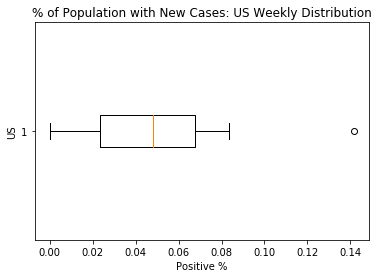

In [21]:
#Visualising US weekly distribution of new cases
plt.boxplot(us_weekly_sum['%NewCases'], vert = False)
plt.title('% of Population with New Cases: US Weekly Distribution')
plt.xlabel('Positive %')
plt.ylabel('US')
plt.show()

In [22]:
#Create a new summary table for DK weekly case and death counts
dk_weekly_sum = dk_CDC_weekly.describe()
dk_weekly_sum.drop(['week_num'], axis = 1, inplace = True)
dk_weekly_sum.drop(['count'], inplace = True)
dk_weekly_sum

,cases,deaths,Death_Rate,%NewCases,%NewDeaths
mean,477.142857,17.828571,2.123133,0.008218,0.000307
std,515.781483,29.608709,2.379434,0.008883,0.000510
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.500000,0.000000,0.000000,0.000267,0.000000
50%,291.000000,3.000000,0.881057,0.005012,0.000052
75%,724.500000,17.000000,4.683038,0.012478,0.000293
max,1919.000000,99.000000,6.902087,0.033052,0.001705


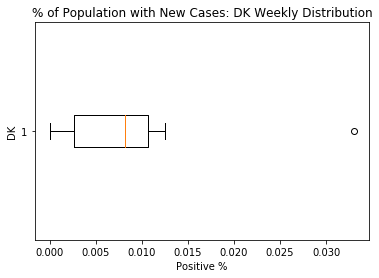

In [23]:
#Visualising DK weekly distribution of new cases
plt.boxplot(dk_weekly_sum['%NewCases'], vert = False)
plt.title('% of Population with New Cases: DK Weekly Distribution')
plt.xlabel('Positive %')
plt.ylabel('DK')
plt.show()

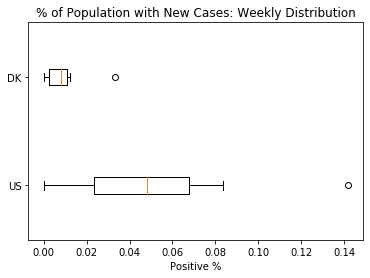

In [24]:
#Comparative weekly distribution of new cases boxplot: Used in paper
plt.boxplot([us_weekly_sum['%NewCases'],dk_weekly_sum['%NewCases']], positions=[1,2], labels = ['US', 'DK'], vert = False)
plt.title('% of Population with New Cases: Weekly Distribution')
plt.xlabel('Positive %')
plt.show()

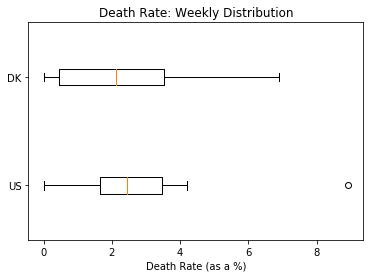

In [25]:
#Comparative weekly distribution of death rate boxplot: not used in paper
plt.boxplot([us_weekly_sum['Death_Rate'],dk_weekly_sum['Death_Rate']], positions=[1,2], labels = ['US', 'DK'], vert = False)
plt.title('Death Rate: Weekly Distribution')
plt.xlabel('Death Rate (as a %)')
plt.show()

### 2. Methods: Descriptive Time Series
#### Weekly % New Cases Comparison

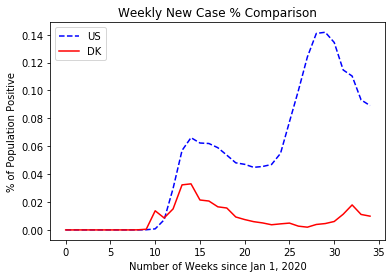

In [26]:
#Create a joined table with both US and DK values 
nc_plot = us_CDC_weekly.join(dk_CDC_weekly, rsuffix = 'DK')
nc_plot = nc_plot[['dateRep', 'week_num','%NewCases', '%NewCasesDK']]
nc_plot.rename(columns ={'%NewCases':'US','%NewCasesDK': 'DK'}, inplace = True)

plt.plot(nc_plot['US'],ls = '--',label = 'US', color = 'Blue')
plt.plot(nc_plot['DK'], label = 'DK', color = 'Red')
plt.legend(loc = 'upper left')
plt.title('Weekly New Case % Comparison')
plt.xlabel('Number of Weeks since Jan 1, 2020')
plt.ylabel('% of Population Positive')
plt.show()

#### Weekly Death Rate Comparison

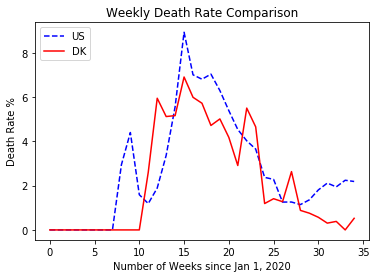

In [27]:
#Create a joined table with both US and DK values 
dr_plot = us_CDC_weekly.join(dk_CDC_weekly, rsuffix = 'DK')
dr_plot = dr_plot[['dateRep', 'week_num','Death_Rate', 'Death_RateDK']]
dr_plot.rename(columns ={'Death_Rate':'US','Death_RateDK': 'DK'}, inplace = True)

plt.plot(dr_plot['US'],ls = '--',label = 'US', color = 'Blue')
plt.plot(dr_plot['DK'], label = 'DK', color = 'Red')
plt.legend(loc = 'upper left')
plt.title('Weekly Death Rate Comparison')
plt.xlabel('Number of Weeks since Jan 1, 2020')
plt.ylabel('Death Rate %')
plt.show()

### 2. Methods: Segmented Regression
#### Introducing the segments

In [28]:
#Creates the segment column in weekly aggregated tables for each country
us_CDC_weekly['Seg'] = 4
us_CDC_weekly.loc[(us_CDC_weekly['week_num'] >=23) & (us_CDC_weekly['week_num'] <= 29), 'Seg'] = 3
us_CDC_weekly.loc[(us_CDC_weekly['week_num'] >=14) & (us_CDC_weekly['week_num'] <= 23), 'Seg'] = 2
us_CDC_weekly.loc[(us_CDC_weekly['week_num'] >= 6) & (us_CDC_weekly['week_num'] <= 14), 'Seg'] = 1
us_CDC_weekly.loc[(us_CDC_weekly['week_num'] >= 0) & (us_CDC_weekly['week_num'] <= 6), 'Seg'] = 0

dk_CDC_weekly['Seg'] = 4
dk_CDC_weekly.loc[(dk_CDC_weekly['week_num'] >=23) & (dk_CDC_weekly['week_num'] <= 29), 'Seg'] = 3
dk_CDC_weekly.loc[(dk_CDC_weekly['week_num'] >=14) & (dk_CDC_weekly['week_num'] <= 23), 'Seg'] = 2
dk_CDC_weekly.loc[(dk_CDC_weekly['week_num'] >= 6) & (dk_CDC_weekly['week_num'] <= 14), 'Seg'] = 1
dk_CDC_weekly.loc[(dk_CDC_weekly['week_num'] >= 0) & (dk_CDC_weekly['week_num'] <= 6), 'Seg'] = 0

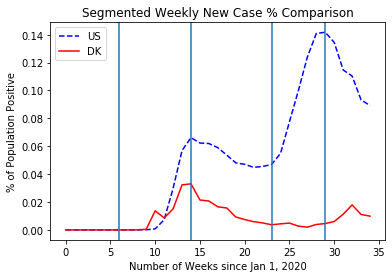

In [29]:
#Re-plot weekly new case % comparison including segment breakdowns
plt.plot(nc_plot['US'],ls = '--',label = 'US', color = 'Blue')
plt.plot(nc_plot['DK'], label = 'DK', color = 'Red')
plt.legend(loc = 'upper left')
plt.title('Segmented Weekly New Case % Comparison')
plt.xlabel('Number of Weeks since Jan 1, 2020')
plt.ylabel('% of Population Positive')
plt.axvline(x=6) #Segment 0 end 
plt.axvline(x=14) #Segment 1 end 
plt.axvline(x=23) #Segment 2 end 
plt.axvline(x=29) #Segment 3 end 
plt.show()

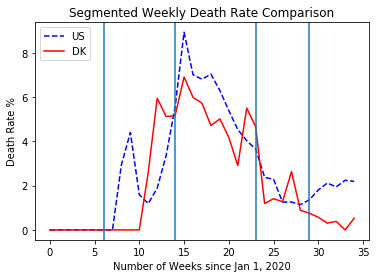

In [30]:
#Re-plot weekly death rate comparison including segment breakdowns
plt.plot(dr_plot['US'],ls = '--',label = 'US', color = 'Blue')
plt.plot(dr_plot['DK'], label = 'DK', color = 'Red')
plt.legend(loc = 'upper left')
plt.title('Segmented Weekly Death Rate Comparison')
plt.xlabel('Number of Weeks since Jan 1, 2020')
plt.ylabel('Death Rate %')
plt.axvline(x=6) #Segment 0 end 
plt.axvline(x=14) #Segment 1 end 
plt.axvline(x=23) #Segment 2 end 
plt.axvline(x=29) #Segment 3 end 
plt.show()

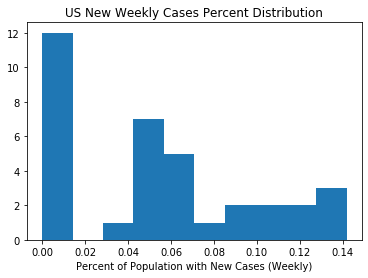

Shapiro-Wilks: (0.8892138600349426, 0.0020537746604532003)  : Not Normal


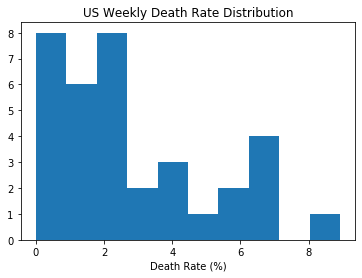

Shapiro-Wilks: (0.898413360118866, 0.0035852266009896994)  : Not Normal


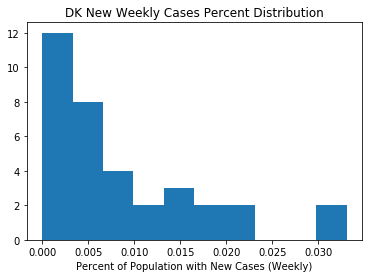

Shapiro-Wilks: (0.8452640771865845, 0.0001803846244001761)  : Not Normal


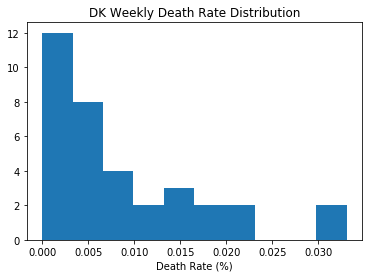

Shapiro-Wilks: (0.8062213659286499, 2.7080955987912603e-05)  : Not Normal


In [31]:
#Are %NewCases and Death_Rate normally distributed? 

plt.hist(us_CDC_weekly['%NewCases'])
plt.title('US New Weekly Cases Percent Distribution')
plt.xlabel('Percent of Population with New Cases (Weekly)')
plt.show()
print('Shapiro-Wilks:',stats.shapiro(us_CDC_weekly['%NewCases']),' : Not Normal')

plt.hist(us_CDC_weekly['Death_Rate'])
plt.title('US Weekly Death Rate Distribution')
plt.xlabel('Death Rate (%)')
plt.show()
print('Shapiro-Wilks:', stats.shapiro(us_CDC_weekly['Death_Rate']),' : Not Normal')

plt.hist(dk_CDC_weekly['%NewCases'])
plt.title('DK New Weekly Cases Percent Distribution')
plt.xlabel('Percent of Population with New Cases (Weekly)')
plt.show()
print('Shapiro-Wilks:',stats.shapiro(dk_CDC_weekly['%NewCases']),' : Not Normal')

plt.hist(dk_CDC_weekly['%NewCases'])
plt.title('DK Weekly Death Rate Distribution')
plt.xlabel('Death Rate (%)')
plt.show()
print('Shapiro-Wilks:',stats.shapiro(dk_CDC_weekly['Death_Rate']),' : Not Normal')

#### United States

In [32]:
#Create individual sub-tables for each segment in order to fit different regression lines
seg0 = us_CDC_weekly[us_CDC_weekly['Seg'] == 0]
seg1 = us_CDC_weekly[us_CDC_weekly['Seg'] == 1]
seg2 = us_CDC_weekly[us_CDC_weekly['Seg'] == 2]
seg3 = us_CDC_weekly[us_CDC_weekly['Seg'] == 3]
seg4 = us_CDC_weekly[us_CDC_weekly['Seg'] == 4]

In [33]:
#Fit linear regression lines for Weekly new cases in each individual segment (besides segment 0)
#error = Total squared error
#R2 = 1 - RSS/TSS

slope1, inter1 = np.polyfit(seg1['week_num'], seg1['%NewCases'], 1)
x1 = [7,8,9,10,11,12,13,14] #weeks in segment 1
val1 = [slope1 * i + inter1 for i in x1]
error1 = [(seg1['%NewCases'][i] - np.average(seg1['%NewCases']))**2 for i in x1]
print('Slope 1:', round(slope1,5)) 
#print('Residual sum of squares: ', round(float(np.polyfit(seg1['week_num'], seg1['%NewCases'], 1,full = True)[1]),4))
print('R-2: ', 1-(round(float(np.polyfit(seg1['week_num'], seg1['%NewCases'], 1,full = True)[1]),4)/np.sum(error1)))
print('MEANING: In segement 1 in the US, we expect to see an increase in new case percent by ',round(slope1,5))

slope2, inter2 = np.polyfit(seg2['week_num'], seg2['%NewCases'], 1)
x2 = [15,16,17,18,19,20,21,22,23] #weeks in segment 2
val2 = [slope2 * i + inter2 for i in x2]
error2 = [(seg2['%NewCases'][i] - np.average(seg2['%NewCases']))**2 for i in x2]
print('Slope 2:', round(slope2,5)) 
#print('Residual sum of squares: ', round(float(np.polyfit(seg2['week_num'], seg2['%NewCases'], 1,full = True)[1]),4))
print('R-2: ', 1-(round(float(np.polyfit(seg2['week_num'], seg2['%NewCases'], 1,full = True)[1]),4)/np.sum(error2)))
print('MEANING: In segement 2 in the US, we expect to see a decrease in weekly new case percent by ', round(slope2, 5))

slope3, inter3 = np.polyfit(seg3['week_num'], seg3['%NewCases'], 1)
x3 = [24,25,26,27,28,29] #weeks in segment 3
val3 = [slope3 * i + inter3 for i in x3]
error3 = [(seg3['%NewCases'][i] - np.average(seg3['%NewCases']))**2 for i in x3]
print('Slope 3:', round(slope3,5)) 
#print('Residual sum of squares: ', round(float(np.polyfit(seg3['week_num'], seg3['%NewCases'], 1,full = True)[1]),4))
print('R-2: ', 1-(round(float(np.polyfit(seg3['week_num'], seg3['%NewCases'], 1,full = True)[1]),4)/np.sum(error3)))
print('MEANING: In segement 3 in the US, we expect to see an increase in weekly new case percent by ', round(slope3,5))

slope4, inter4 = np.polyfit(seg4['week_num'], seg4['%NewCases'], 1)
x4 = [30,31,32,33,34] #weeks in segment 4
val4 = [slope4 * i + inter4 for i in x4]
error4 = [(seg4['%NewCases'][i] - np.average(seg4['%NewCases']))**2 for i in x4]
print('Slope 4:', round(slope4,5))
#print('Residual sum of squares: ', round(float(np.polyfit(seg4['week_num'], seg4['%NewCases'], 1,full = True)[1]),4))
print('R-2: ', 1-(round(float(np.polyfit(seg4['week_num'], seg4['%NewCases'], 1,full = True)[1]),4)/np.sum(error4)))
print('MEANING: In segement 4 in the US, we expect to see a decrease in weekly new case percent by ', round(slope4, 5))

Slope 1: 0.01004
R-2:  0.7933490958830334
MEANING: In segement 1 in the US, we expect to see an increase in new case percent by  0.01004
Slope 2: -0.00243
R-2:  0.759457964449432
MEANING: In segement 2 in the US, we expect to see a decrease in weekly new case percent by  -0.00243
Slope 3: 0.01853
R-2:  0.9522475275955082
MEANING: In segement 3 in the US, we expect to see an increase in weekly new case percent by  0.01853
Slope 4: -0.0112
R-2:  0.9242658260090199
MEANING: In segement 4 in the US, we expect to see a decrease in weekly new case percent by  -0.0112


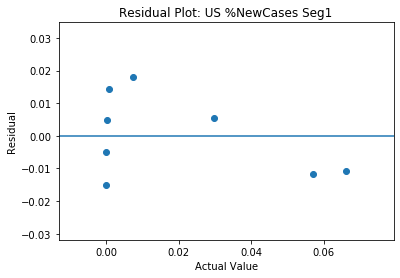

Shapiro-Wilks: (0.917967677116394, 0.4135909378528595)  : Normal


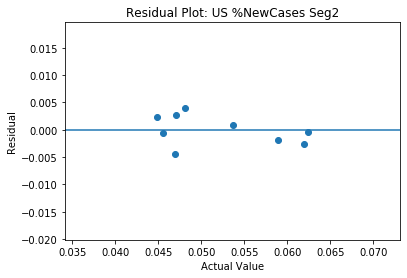

Shapiro-Wilks: (0.9753977656364441, 0.9365465641021729)  : Normal


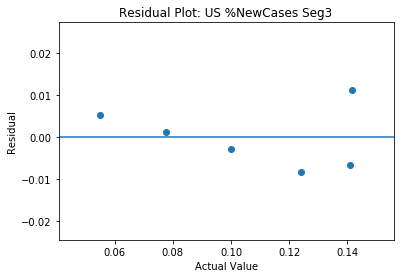

Shapiro-Wilks: (0.9560784697532654, 0.7890655994415283)  : Normal


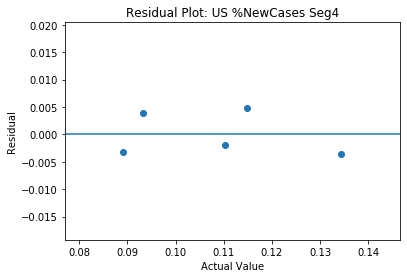

Shapiro-Wilks: (0.8193918466567993, 0.11551164090633392)  : Normal


In [34]:
#Are the residuals normally distributed?
seg1['predicited'] = val1
seg1['resid'] = seg1['predicited'] - seg1['%NewCases']
plt.scatter(seg1['%NewCases'],seg1['resid'])
plt.title('Residual Plot: US %NewCases Seg1')
plt.xlabel('Actual Value')
plt.ylabel('Residual')
plt.axhline(0)
plt.show()
print('Shapiro-Wilks:',stats.shapiro(seg1['resid']),' : Normal')

seg2['predicited'] = val2
seg2['resid'] = seg2['predicited'] - seg2['%NewCases']
plt.scatter(seg2['%NewCases'],seg2['resid'])
plt.title('Residual Plot: US %NewCases Seg2')
plt.xlabel('Actual Value')
plt.ylabel('Residual')
plt.axhline(0)
plt.show()
print('Shapiro-Wilks:',stats.shapiro(seg2['resid']),' : Normal')

seg3['predicited'] = val3
seg3['resid'] = seg3['predicited'] - seg3['%NewCases']
plt.scatter(seg3['%NewCases'],seg3['resid'])
plt.title('Residual Plot: US %NewCases Seg3')
plt.xlabel('Actual Value')
plt.ylabel('Residual')
plt.axhline(0)
plt.show()
print('Shapiro-Wilks:',stats.shapiro(seg3['resid']),' : Normal')

seg4['predicited'] = val4
seg4['resid'] = seg4['predicited'] - seg4['%NewCases']
plt.scatter(seg4['%NewCases'],seg4['resid'])
plt.title('Residual Plot: US %NewCases Seg4')
plt.xlabel('Actual Value')
plt.ylabel('Residual')
plt.axhline(0)
plt.show()
print('Shapiro-Wilks:',stats.shapiro(seg4['resid']),' : Normal')

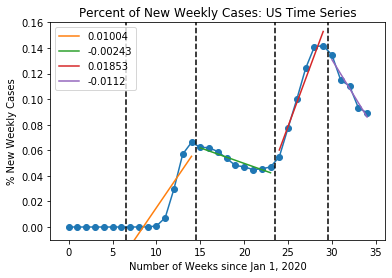

In [35]:
#Plot Weekly Percent of new cases with regression slopes for each segment
plt.plot(us_CDC_weekly['%NewCases'])
plt.scatter(us_CDC_weekly['week_num'], us_CDC_weekly['%NewCases'])
plt.title('Percent of New Weekly Cases: US Time Series')
plt.ylabel('% New Weekly Cases')
plt.xlabel('Number of Weeks since Jan 1, 2020')
plt.axvline(x=6.5, color = 'black', ls = '--')
plt.axvline(x=14.5, color = 'black', ls = '--')
plt.axvline(x=23.5, color = 'black', ls = '--')
plt.axvline(x=29.5, color = 'black', ls = '--')
plt.ylim(-0.01, .16)
plt.plot(x1, val1, label = round(slope1,5))
plt.plot(x2, val2, label = round(slope2,5))
plt.plot(x3, val3, label = round(slope3,5))
plt.plot(x4, val4, label = round(slope4,5))
plt.legend()
plt.show()

In [36]:
#Fit linear regression lines for weekly death rate in each segment 
#error = Total squared error
#R2 = 1 - RSS/TSS

slope1, inter1 = np.polyfit(seg1['week_num'], seg1['Death_Rate'], 1)
x1 = [7,8,9,10,11,12,13,14]
val1 = [slope1 * i + inter1 for i in x1]
error1 = [(seg1['Death_Rate'][i] - np.average(seg1['Death_Rate']))**2 for i in x1]
print('Slope 1:', round(slope1,3)) 
#print('Residual sum of squares: ', round(float(np.polyfit(seg1['week_num'], seg1['Death_Rate'], 1,full = True)[1]),4))
print('R-2: ',1-(round(float(np.polyfit(seg1['week_num'], seg1['Death_Rate'], 1,full = True)[1]),4)/np.sum(error1)))
print('MEANING: In segement 1 in the US, we expect to see an increase in weekly death rate by ', round(slope1,3))

slope2, inter2 = np.polyfit(seg2['week_num'], seg2['Death_Rate'], 1)
x2 = [15,16,17,18,19,20,21,22,23]
val2 = [slope2 * i + inter2 for i in x2]
error2 = [(seg2['Death_Rate'][i] - np.average(seg2['Death_Rate']))**2 for i in x2]
print('Slope 2:', round(slope2,3)) 
#print('Residual sum of squares: ', round(float(np.polyfit(seg2['week_num'], seg2['Death_Rate'], 1,full = True)[1]),4))
print('R-2: ',1-(round(float(np.polyfit(seg2['week_num'], seg2['Death_Rate'], 1,full = True)[1]),4)/np.sum(error2)))
print('MEANING: In segement 2 in the US, we expect to see a decrease in weekly death rate by ', round(slope2,3))

slope3, inter3 = np.polyfit(seg3['week_num'], seg3['Death_Rate'], 1)
x3 = [24,25,26,27,28,29]
val3 = [slope3 * i + inter3 for i in x3]
error3 = [(seg3['Death_Rate'][i] - np.average(seg3['Death_Rate']))**2 for i in x3]
print('Slope 3:', round(slope3,3)) 
#print('Residual sum of squares: ', round(float(np.polyfit(seg3['week_num'], seg3['Death_Rate'], 1,full = True)[1]),4))
print('R-2: ',1-(round(float(np.polyfit(seg3['week_num'], seg3['Death_Rate'], 1,full = True)[1]),4)/np.sum(error3)))
print('MEANING: In segement 3 in the US, we expect to see a decrease in weekly death rate by ', round(slope3,3))

slope4, inter4 = np.polyfit(seg4['week_num'], seg4['Death_Rate'], 1)
x4 = [30,31,32,33,34]
val4 = [slope4 * i + inter4 for i in x4]
error4 = [(seg4['Death_Rate'][i] - np.average(seg4['Death_Rate']))**2 for i in x4]
print('Slope 4:', round(slope4,3))
#print('Residual sum of squares: ', round(float(np.polyfit(seg4['week_num'], seg4['Death_Rate'], 1,full = True)[1]),4))
print('R-2: ',1-(round(float(np.polyfit(seg4['week_num'], seg4['Death_Rate'], 1,full = True)[1]),4)/np.sum(error4)))
print('MEANING: In segement 4 in the US, we expect to see an increase in weekly death rate by ', round(slope4,3)) 

Slope 1: 0.394
R-2:  0.2844080909262605
MEANING: In segement 1 in the US, we expect to see an increase in weekly death rate by  0.394
Slope 2: -0.604
R-2:  0.938579454688701
MEANING: In segement 2 in the US, we expect to see a decrease in weekly death rate by  -0.604
Slope 3: -0.242
R-2:  0.6578496197230166
MEANING: In segement 3 in the US, we expect to see a decrease in weekly death rate by  -0.242
Slope 4: 0.089
R-2:  0.608908842994785
MEANING: In segement 4 in the US, we expect to see an increase in weekly death rate by  0.089


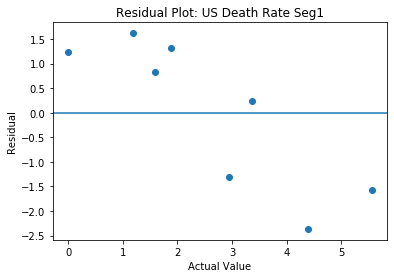

Shapiro-Wilks: (0.8824471235275269, 0.19871927797794342)  : Normal


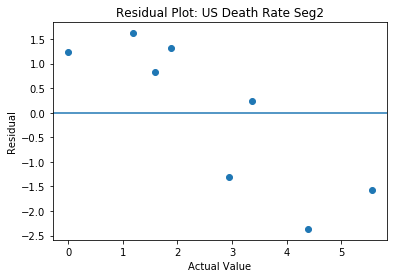

Shapiro-Wilks: (0.9682088494300842, 0.8789917826652527)  : Normal


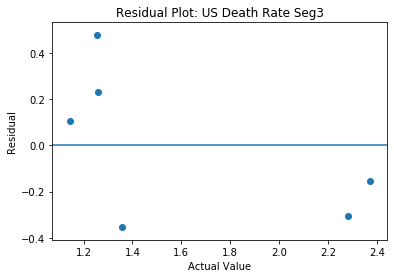

Shapiro-Wilks: (0.9364258050918579, 0.630553662776947)  : Normal


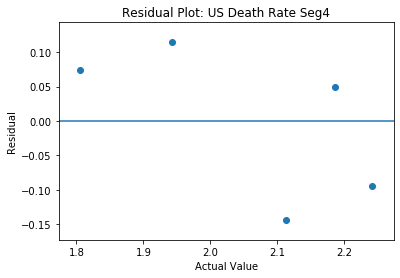

Shapiro-Wilks: (0.8903805017471313, 0.3590202331542969)  : Normal


In [37]:
#Are the residuals normally distributed?
seg1['predicited'] = val1
seg1['resid'] = seg1['predicited'] - seg1['Death_Rate']
plt.scatter(seg1['Death_Rate'],seg1['resid'])
plt.title('Residual Plot: US Death Rate Seg1')
plt.xlabel('Actual Value')
plt.ylabel('Residual')
plt.axhline(0)
plt.show()
print('Shapiro-Wilks:',stats.shapiro(seg1['resid']),' : Normal')

seg2['predicited'] = val2
seg2['resid'] = seg2['predicited'] - seg2['Death_Rate']
plt.scatter(seg1['Death_Rate'],seg1['resid'])
plt.title('Residual Plot: US Death Rate Seg2')
plt.xlabel('Actual Value')
plt.ylabel('Residual')
plt.axhline(0)
plt.show()
print('Shapiro-Wilks:',stats.shapiro(seg2['resid']),' : Normal')

seg3['predicited'] = val3
seg3['resid'] = seg3['predicited'] - seg3['Death_Rate']
plt.scatter(seg3['Death_Rate'],seg3['resid'])
plt.title('Residual Plot: US Death Rate Seg3')
plt.xlabel('Actual Value')
plt.ylabel('Residual')
plt.axhline(0)
plt.show()
print('Shapiro-Wilks:',stats.shapiro(seg3['resid']),' : Normal')

seg4['predicited'] = val4
seg4['resid'] = seg4['predicited'] - seg4['Death_Rate']
plt.scatter(seg4['Death_Rate'],seg4['resid'])
plt.title('Residual Plot: US Death Rate Seg4')
plt.xlabel('Actual Value')
plt.ylabel('Residual')
plt.axhline(0)
plt.show()
print('Shapiro-Wilks:',stats.shapiro(seg4['resid']),' : Normal')

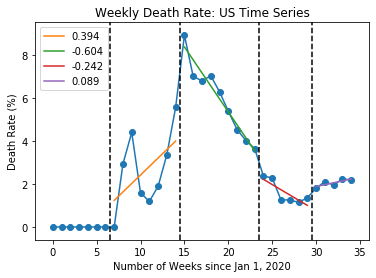

In [38]:
#Plot weekly number of Deaths with regression segments 
plt.plot(us_CDC_weekly['Death_Rate'])
plt.scatter(us_CDC_weekly['week_num'], us_CDC_weekly['Death_Rate'])
plt.title('Weekly Death Rate: US Time Series')
plt.ylabel('Death Rate (%)')
plt.xlabel('Number of Weeks since Jan 1, 2020')
plt.axvline(x=6.5, color = 'black', ls = '--')
plt.axvline(x=14.5, color = 'black', ls = '--')
plt.axvline(x=23.5, color = 'black', ls = '--')
plt.axvline(x=29.5, color = 'black', ls = '--')
plt.plot(x1, val1, label = round(slope1,3))
plt.plot(x2, val2, label = round(slope2,3))
plt.plot(x3, val3, label = round(slope3,3))
plt.plot(x4, val4, label = round(slope4,3))
plt.legend()
plt.show()

#### Denmark

In [39]:
#Re-create segments for weekly DK tbale
seg0 = dk_CDC_weekly[dk_CDC_weekly['Seg'] == 0]
seg1 = dk_CDC_weekly[dk_CDC_weekly['Seg'] == 1]
seg2 = dk_CDC_weekly[dk_CDC_weekly['Seg'] == 2]
seg3 = dk_CDC_weekly[dk_CDC_weekly['Seg'] == 3]
seg4 = dk_CDC_weekly[dk_CDC_weekly['Seg'] == 4]

In [40]:
#Fit linear regression lines for Weekly new cases in each individual segment (besides segment 0)
#error = Total squared error
#R2 = 1 - RSS/TSS

slope1, inter1 = np.polyfit(seg1['week_num'], seg1['%NewCases'], 1)
x1 = [7,8,9,10,11,12,13,14]
val1 = [slope1 * i + inter1 for i in x1]
error1 = [(seg1['%NewCases'][i] - np.average(seg1['%NewCases']))**2 for i in x1]
print('Slope 1:', round(slope1,5)) 
#print('Residual sum of squares: ', round(float(np.polyfit(seg1['week_num'], seg1['%NewCases'], 1,full = True)[1]),4))
print('R-2: ',1-(round(float(np.polyfit(seg1['week_num'], seg1['%NewCases'], 1,full = True)[1]),6)/np.sum(error1)))
print('MEANING: In segement 1 in Denmark, we expect to see an increase in weekly new case percent by ', round(slope1,5))

slope2, inter2 = np.polyfit(seg2['week_num'], seg2['%NewCases'], 1)
x2 = [15,16,17,18,19,20,21,22,23]
val2 = [slope2 * i + inter2 for i in x2]
error2 = [(seg2['%NewCases'][i] - np.average(seg2['%NewCases']))**2 for i in x2]
print('Slope 2:', round(slope2,5)) 
#print('Residual sum of squares: ', round(float(np.polyfit(seg2['week_num'], seg2['%NewCases'], 1,full = True)[1]),6))
print('R-2: ', 1-(round(float(np.polyfit(seg2['week_num'], seg2['%NewCases'], 1,full = True)[1]),6)/np.sum(error2)))
print('MEANING: In segement 2 in Denmark, we expect to see a decrease in weekly new case percent by ', round(slope2,5))

slope3, inter3 = np.polyfit(seg3['week_num'], seg3['%NewCases'], 1)
x3 = [24,25,26,27,28,29]
val3 = [slope3 * i + inter3 for i in x3]
error3 = [(seg3['%NewCases'][i] - np.average(seg3['%NewCases']))**2 for i in x3]
print('Slope 3:', round(slope3,5)) 
#print('Residual sum of squares: ', round(float(np.polyfit(seg3['week_num'], seg3['%NewCases'], 1,full = True)[1]),6))
print('R-2: ', 1-(round(float(np.polyfit(seg3['week_num'], seg3['%NewCases'], 1,full = True)[1]),6)/np.sum(error3)))
print('MEANING: In segement 3 in Denmark, we expect to see a decrease in weekly new case percent by ', round(slope3,5))

slope4, inter4 = np.polyfit(seg4['week_num'], seg4['%NewCases'], 1)
x4 = [30,31,32,33,34]
val4 = [slope4 * i + inter4 for i in x4]
error4 = [(seg4['%NewCases'][i] - np.average(seg4['%NewCases']))**2 for i in x4]
print('Slope 4:', round(slope4,5))
#print('Residual sum of squares: ', round(float(np.polyfit(seg4['week_num'], seg4['%NewCases'], 1,full = True)[1]),4))
print('R-2: ', 1-(round(float(np.polyfit(seg4['week_num'], seg4['%NewCases'], 1,full = True)[1]),6)/np.sum(error4)) )
print('MEANING: In segement 4 in Denmark, we expect to see an increase in weekly new case percent by ', round(slope4,5))

Slope 1: 0.00513
R-2:  0.8568625290733288
MEANING: In segement 1 in Denmark, we expect to see an increase in weekly new case percent by  0.00513
Slope 2: -0.00246
R-2:  0.9503294425727188
MEANING: In segement 2 in Denmark, we expect to see a decrease in weekly new case percent by  -0.00246
Slope 3: -7e-05
R-2:  -0.05697089001333433
MEANING: In segement 3 in Denmark, we expect to see a decrease in weekly new case percent by  -7e-05
Slope 4: 0.00075
R-2:  0.07652376236683611
MEANING: In segement 4 in Denmark, we expect to see an increase in weekly new case percent by  0.00075


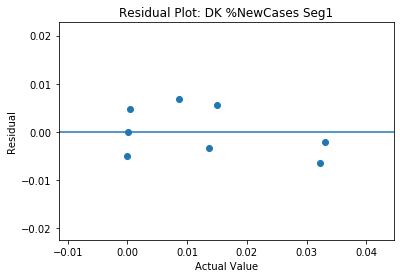

Shapiro-Wilks: (0.9170361757278442, 0.4062792956829071)  : Normal


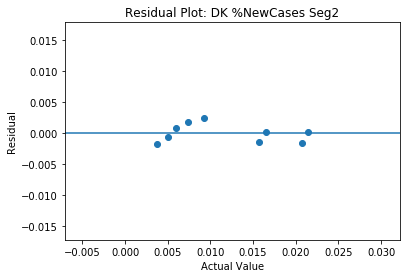

Shapiro-Wilks: (0.9289038181304932, 0.47097912430763245)  : Normal


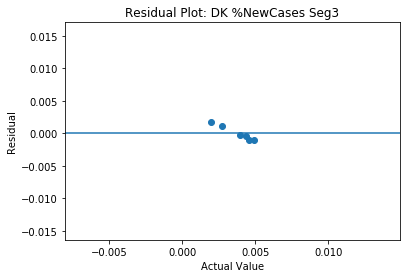

Shapiro-Wilks: (0.8707873821258545, 0.2293618768453598)  : Normal


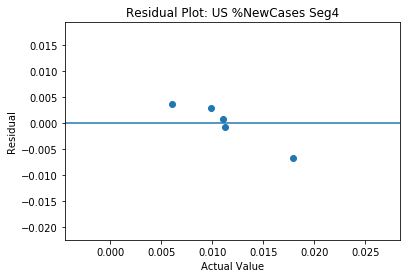

Shapiro-Wilks: (0.8893314599990845, 0.35375261306762695)  : Normal


In [41]:
#Are the residuals normally distibuted?
seg1['predicited'] = val1
seg1['resid'] = seg1['predicited'] - seg1['%NewCases']
plt.scatter(seg1['%NewCases'],seg1['resid'])
plt.title('Residual Plot: DK %NewCases Seg1')
plt.xlabel('Actual Value')
plt.ylabel('Residual')
plt.axhline(0)
plt.show()
print('Shapiro-Wilks:',stats.shapiro(seg1['resid']),' : Normal')

seg2['predicited'] = val2
seg2['resid'] = seg2['predicited'] - seg2['%NewCases']
plt.scatter(seg2['%NewCases'],seg2['resid'])
plt.title('Residual Plot: DK %NewCases Seg2')
plt.xlabel('Actual Value')
plt.ylabel('Residual')
plt.axhline(0)
plt.show()
print('Shapiro-Wilks:',stats.shapiro(seg2['resid']),' : Normal')

seg3['predicited'] = val3
seg3['resid'] = seg3['predicited'] - seg3['%NewCases']
plt.scatter(seg3['%NewCases'],seg3['resid'])
plt.title('Residual Plot: DK %NewCases Seg3')
plt.xlabel('Actual Value')
plt.ylabel('Residual')
plt.axhline(0)
plt.show()
print('Shapiro-Wilks:',stats.shapiro(seg3['resid']),' : Normal')

seg4['predicited'] = val4
seg4['resid'] = seg4['predicited'] - seg4['%NewCases']
plt.scatter(seg4['%NewCases'],seg4['resid'])
plt.title('Residual Plot: US %NewCases Seg4')
plt.xlabel('Actual Value')
plt.ylabel('Residual')
plt.axhline(0)
plt.show()
print('Shapiro-Wilks:',stats.shapiro(seg4['resid']),' : Normal')

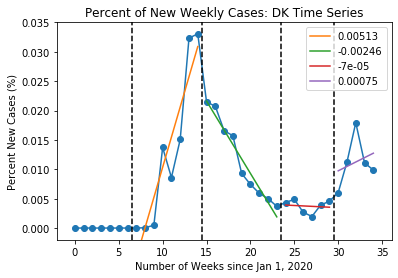

In [42]:
#Plot weekly percent of new cases with regression segments
plt.plot(dk_CDC_weekly['%NewCases'])
plt.scatter(dk_CDC_weekly['week_num'], dk_CDC_weekly['%NewCases'])
plt.title('Percent of New Weekly Cases: DK Time Series')
plt.ylabel('Percent New Cases (%)')
plt.xlabel('Number of Weeks since Jan 1, 2020')
plt.axvline(x=6.5, color = 'black', ls = '--')
plt.axvline(x=14.5, color = 'black', ls = '--')
plt.axvline(x=23.5, color = 'black', ls = '--')
plt.axvline(x=29.5, color = 'black', ls = '--')
plt.ylim(-.002,.035)
plt.plot(x1, val1,label = round(slope1,5))
plt.plot(x2, val2,label = round(slope2,5))
plt.plot(x3, val3,label = round(slope3,5))
plt.plot(x4, val4,label = round(slope4,5))
plt.legend()
plt.show()

In [43]:
#Fit linear regression lines for Weekly death rates in each individual segment (besides segment 0)
#error = Total squared error
#R2 = 1 - RSS/TSS

slope1, inter1 = np.polyfit(seg1['week_num'], seg1['Death_Rate'], 1)
x1 = [7,8,9,10,11,12,13,14]
val1 = [slope1 * i + inter1 for i in x1]
error1 = [(seg1['Death_Rate'][i] - np.average(seg1['Death_Rate']))**2 for i in x1]
print('Slope 1:', round(slope1,3)) 
#print('Residual sum of squares: ', round(float(np.polyfit(seg1['week_num'], seg1['Death_Rate'], 1,full = True)[1]),4))
print('R-2: ', 1-(round(float(np.polyfit(seg1['week_num'], seg1['Death_Rate'], 1,full = True)[1]),4)/np.sum(error1)))
print('MEANING: In segement 1 in Denmark, we expect to see an increase in death rate of ', round(slope1,3))

slope2, inter2 = np.polyfit(seg2['week_num'], seg2['Death_Rate'], 1)
x2 = [15,16,17,18,19,20,21,22,23]
val2 = [slope2 * i + inter2 for i in x2]
error2 = [(seg2['Death_Rate'][i] - np.average(seg2['Death_Rate']))**2 for i in x2]
print('Slope 2:', round(slope2,3)) 
#print('Residual sum of squares: ', round(float(np.polyfit(seg2['week_num'], seg2['Death_Rate'], 1,full = True)[1]),4))
print('R-2: ', 1-(round(float(np.polyfit(seg2['week_num'], seg2['Death_Rate'], 1,full = True)[1]),4)/np.sum(error2)) )
print('MEAING: In segment 2 in Denmark, we expect to see a decrease in death rate of ', round(slope2,3))

slope3, inter3 = np.polyfit(seg3['week_num'], seg3['Death_Rate'], 1)
x3 = [24,25,26,27,28,29]
val3 = [slope3 * i + inter3 for i in x3]
error3 = [(seg3['Death_Rate'][i] - np.average(seg3['Death_Rate']))**2 for i in x3]
print('Slope 3:', round(slope3,3)) 
#print('Residual sum of squares: ', round(float(np.polyfit(seg3['week_num'], seg3['Death_Rate'], 1,full = True)[1]),4))
print('R-2: ', 1-(round(float(np.polyfit(seg3['week_num'], seg3['Death_Rate'], 1,full = True)[1]),4)/np.sum(error3)))
print('MEANING: In segemnt 3 in Denmark, we expect to see a decrease in death rate of ', round(slope3,3))

slope4, inter4 = np.polyfit(seg4['week_num'], seg4['Death_Rate'], 1)
x4 = [30,31,32,33,34]
val4 = [slope4 * i + inter4 for i in x4]
error4 = [(seg4['Death_Rate'][i] - np.average(seg4['Death_Rate']))**2 for i in x4]
print('Slope 4:', round(slope4,3))
#print('Residual sum of squares: ', round(float(np.polyfit(seg4['week_num'], seg4['Death_Rate'], 1,full = True)[1]),4))
print('R-2: ', 1-(round(float(np.polyfit(seg4['week_num'], seg4['Death_Rate'], 1,full = True)[1]),4)/np.sum(error4)))
print('MEANING: In segment 4 in Denmark, we expect to see a decrease in death rate of ', round(slope4,3))

Slope 1: 0.978
R-2:  0.7933655343284289
MEANING: In segement 1 in Denmark, we expect to see an increase in death rate of  0.978
Slope 2: -0.277
R-2:  0.4353756664230276
MEAING: In segment 2 in Denmark, we expect to see a decrease in death rate of  -0.277
Slope 3: -0.069
R-2:  0.036649883348039425
MEANING: In segemnt 3 in Denmark, we expect to see a decrease in death rate of  -0.069
Slope 4: -0.04
R-2:  0.07797299408724245
MEANING: In segment 4 in Denmark, we expect to see a decrease in death rate of  -0.04


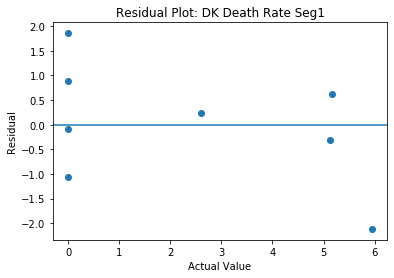

Shapiro-Wilks: (0.9874604344367981, 0.9901479482650757)  : Normal


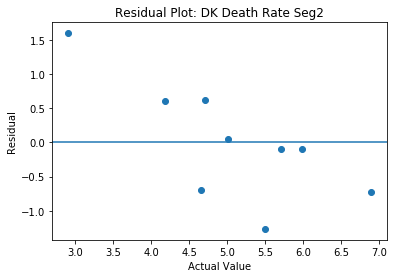

Shapiro-Wilks: (0.965718686580658, 0.8558412194252014)  : Normal


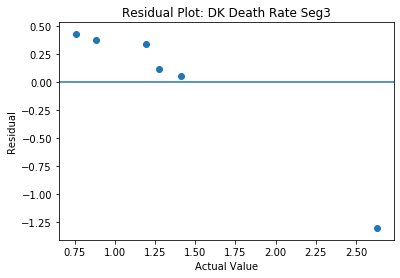

Shapiro-Wilks: (0.69556725025177, 0.00554939080029726)  : Not Normal


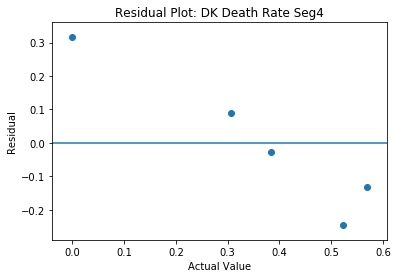

Shapiro-Wilks: (0.9770587086677551, 0.9183060526847839)  : Normal


In [44]:
#Are the residuals normally distributed?
seg1['predicited'] = val1
seg1['resid'] = seg1['predicited'] - seg1['Death_Rate']
plt.scatter(seg1['Death_Rate'],seg1['resid'])
plt.title('Residual Plot: DK Death Rate Seg1')
plt.xlabel('Actual Value')
plt.ylabel('Residual')
plt.axhline(0)
plt.show()
print('Shapiro-Wilks:',stats.shapiro(seg1['resid']),' : Normal')

seg2['predicited'] = val2
seg2['resid'] = seg2['predicited'] - seg2['Death_Rate']
plt.scatter(seg2['Death_Rate'],seg2['resid'])
plt.title('Residual Plot: DK Death Rate Seg2')
plt.xlabel('Actual Value')
plt.ylabel('Residual')
plt.axhline(0)
plt.show()
print('Shapiro-Wilks:',stats.shapiro(seg2['resid']),' : Normal')

seg3['predicited'] = val3
seg3['resid'] = seg3['predicited'] - seg3['Death_Rate']
plt.scatter(seg3['Death_Rate'],seg3['resid'])
plt.title('Residual Plot: DK Death Rate Seg3')
plt.xlabel('Actual Value')
plt.ylabel('Residual')
plt.axhline(0)
plt.show()
print('Shapiro-Wilks:',stats.shapiro(seg3['resid']),' : Not Normal')

seg4['predicited'] = val4
seg4['resid'] = seg4['predicited'] - seg4['Death_Rate']
plt.scatter(seg4['Death_Rate'],seg4['resid'])
plt.title('Residual Plot: DK Death Rate Seg4')
plt.xlabel('Actual Value')
plt.ylabel('Residual')
plt.axhline(0)
plt.show()
print('Shapiro-Wilks:',stats.shapiro(seg4['resid']),' : Normal')

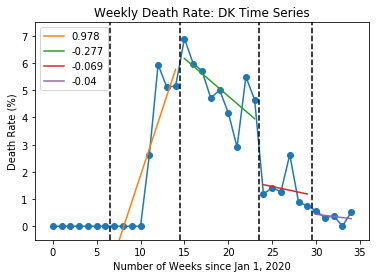

In [45]:
#Plot weekly death rate with regression segments
plt.plot(dk_CDC_weekly['Death_Rate'])
plt.scatter(dk_CDC_weekly['week_num'],dk_CDC_weekly['Death_Rate'])
plt.title('Weekly Death Rate: DK Time Series')
plt.ylabel('Death Rate (%)')
plt.xlabel('Number of Weeks since Jan 1, 2020')
plt.axvline(x=6.5, color = 'black', ls = '--')
plt.axvline(x=14.5, color = 'black', ls = '--')
plt.axvline(x=23.5, color = 'black', ls = '--')
plt.axvline(x=29.5, color = 'black', ls = '--')
plt.ylim(-.5,7.5)
plt.plot(x1, val1,label = round(slope1,3))
plt.plot(x2, val2,label = round(slope2,3))
plt.plot(x3, val3,label = round(slope3,3))
plt.plot(x4, val4,label = round(slope4,3))
plt.legend()
plt.show()

### 2. Methods: Statistical Testing
##### Note: Uses segmented daily data for a larger sample size

   ##### Ho: US = DK (No significant difference)
   ##### Ha: US != DK (Significant difference)
   ##### a = 0.05

In [46]:
#Create the seg variable in the daily data
us_CDC['Seg'] = 4
us_CDC.loc[(us_CDC['week_num'] >=23) & (us_CDC['week_num'] <= 29), 'Seg'] = 3
us_CDC.loc[(us_CDC['week_num'] >=14) & (us_CDC['week_num'] <= 23), 'Seg'] = 2
us_CDC.loc[(us_CDC['week_num'] >= 6) & (us_CDC['week_num'] <= 14), 'Seg'] = 1
us_CDC.loc[(us_CDC['week_num'] >= 0) & (us_CDC['week_num'] <= 6), 'Seg'] = 0

dk_CDC['Seg'] = 4
dk_CDC.loc[(dk_CDC['week_num'] >=23) & (dk_CDC['week_num'] <= 29), 'Seg'] = 3
dk_CDC.loc[(dk_CDC['week_num'] >=14) & (dk_CDC['week_num'] <= 23), 'Seg'] = 2
dk_CDC.loc[(dk_CDC['week_num'] >= 6) & (dk_CDC['week_num'] <= 14), 'Seg'] = 1
dk_CDC.loc[(dk_CDC['week_num'] >= 0) & (dk_CDC['week_num'] <= 6), 'Seg'] = 0

In [47]:
#Create individual segment tables from the each country's daily data
seg0_US = us_CDC[us_CDC['Seg'] == 0]
seg0_US = seg0_US.fillna(0)
seg1_US = us_CDC[us_CDC['Seg'] == 1]
seg1_US = seg1_US.fillna(0)
seg2_US = us_CDC[us_CDC['Seg'] == 2]
seg2_US = seg2_US.fillna(0)
seg3_US = us_CDC[us_CDC['Seg'] == 3]
seg3_US = seg3_US.fillna(0)
seg4_US = us_CDC[us_CDC['Seg'] == 4]
seg4_US = seg4_US.fillna(0)

seg0_DK = dk_CDC[dk_CDC['Seg'] == 0]
seg0_DK = seg0_DK.fillna(0)
seg1_DK = dk_CDC[dk_CDC['Seg'] == 1]
seg1_DK = seg1_DK.fillna(0)
seg2_DK = dk_CDC[dk_CDC['Seg'] == 2]
seg2_DK = seg2_DK.fillna(0)
seg3_DK = dk_CDC[dk_CDC['Seg'] == 3]
seg3_DK = seg3_DK.fillna(0)
seg4_DK = dk_CDC[dk_CDC['Seg'] == 4]
seg4_DK = seg4_DK.fillna(0)

#### Is there a statistically significant difference between the mean % of new cases in the US compared to DK in each individal segment?

In [48]:
print('SEG0')
print('US: ', round(np.mean(seg0_US['%NewCases']),5), 'DK: ', round(np.mean(seg0_DK['%NewCases']),5))
print('p value: ', round(stats.ttest_ind(seg0_US['%NewCases'],seg0_DK['%NewCases']).pvalue,5))
print('significant difference')
print('SEG1')
print('US: ', round(np.mean(seg1_US['%NewCases']),5), 'DK: ', round(np.mean(seg1_DK['%NewCases']),5))
print('p value: ', round(stats.ttest_ind(seg1_US['%NewCases'],seg1_DK['%NewCases']).pvalue,5))
print('no significant difference')
print('SEG2')
print('US: ', round(np.mean(seg2_US['%NewCases']),5), 'DK: ', round(np.mean(seg2_DK['%NewCases']),5))
print('p value: ', round(stats.ttest_ind(seg2_US['%NewCases'],seg2_DK['%NewCases']).pvalue,5))
print('significant difference')
print('SEG3')
print('US: ', round(np.mean(seg3_US['%NewCases']),5), 'DK: ', round(np.mean(seg3_DK['%NewCases']),5))
print('p value: ', round(stats.ttest_ind(seg3_US['%NewCases'],seg3_DK['%NewCases']).pvalue,5))
print('significant differenece')
print('SEG4')
print('US: ', round(np.mean(seg4_US['%NewCases']),5), 'DK: ', round(np.mean(seg4_DK['%NewCases']),5))
print('p value: ', round(stats.ttest_ind(seg4_US['%NewCases'],seg4_DK['%NewCases']).pvalue,5))
print('significant difference')

SEG0
US:  0.0 DK:  0.0
p value:  0.01056
significant difference
SEG1
US:  0.00169 DK:  0.00125
p value:  0.33116
no significant difference
SEG2
US:  0.00776 DK:  0.00215
p value:  0.0
significant difference
SEG3
US:  0.01296 DK:  0.00051
p value:  0.0
significant differenece
SEG4
US:  0.01615 DK:  0.00141
p value:  0.0
significant difference


#### Is there a statistically significant difference between the mean death rate in the US compared to DK in each individal segment?

In [49]:
print('SEG0')
print('US: ', round(np.mean(seg0_US['Death_Rate']),3), 'DK: ', round(np.mean(seg0_DK['Death_Rate']),3))
print('p value: ',round(stats.ttest_ind(seg0_US['Death_Rate'],seg0_DK['Death_Rate']).pvalue,5))
print('no significant difference')
print('SEG1')
print('US: ', round(np.mean(seg1_US['Death_Rate']),3), 'DK: ', round(np.mean(seg1_DK['Death_Rate']),3))
print('p value: ',round(stats.ttest_ind(seg1_US['Death_Rate'],seg1_DK['Death_Rate']).pvalue,5))
print('no significant difference')
print('SEG2')
print('US: ', round(np.mean(seg2_US['Death_Rate']),3), 'DK: ', round(np.mean(seg2_DK['Death_Rate']),3))
print('p value: ',round(stats.ttest_ind(seg2_US['Death_Rate'],seg2_DK['Death_Rate']).pvalue,5))
print('no significant difference')
print('SEG3')
print('US: ', round(np.mean(seg3_US['Death_Rate']),3), 'DK: ', round(np.mean(seg3_DK['Death_Rate']),3))
print('p value: ',round(stats.ttest_ind(seg3_US['Death_Rate'],seg3_DK['Death_Rate']).pvalue,5))
print('no significant difference')
print('SEG4')
print('US: ', round(np.mean(seg4_US['Death_Rate']),3), 'DK: ', round(np.mean(seg4_DK['Death_Rate']),3))
print('p value: ',stats.ttest_ind(seg4_US['Death_Rate'],seg4_DK['Death_Rate']).pvalue)
print('significant difference')

SEG0
US:  0.0 DK:  0.0
p value:  nan
no significant difference
SEG1
US:  2.686 DK:  1.751
p value:  0.30046
no significant difference
SEG2
US:  6.217 DK:  5.314
p value:  0.0524
no significant difference
SEG3
US:  1.978 DK:  2.181
p value:  0.81531
no significant difference
SEG4
US:  1.884 DK:  0.281
p value:  4.372151244640098e-19
significant difference
